<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Translated by Sergey Oreshkov.  [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2021

# <center>Assignment #8. Task </center><a class="tocSkip">

## <center>Implementing Stochastic Gradient Descent for regression and classification  </center><a class="tocSkip">
## <center> 

Here we implement two algorithms  – a regressor and a classifier – driven by stochastic gradient descent (SGD). 


### Your task is to:
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://forms.gle/gC4PN9ntDru4sbZU7).

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_eng__, pinned thread __#a8_bonus__. If you are sure that something is not 100% correct, please leave your feedback via the mentioned webform ↑*

-----


## Plan
1. [Linear regression and SGD](#1.-Linear-regression-and-Stochastic-Gradient-Descent-)
1. [Logistic regression and SGD](#2.-Logistic-Regression-and-SGD)
1. [Logistic regression and SGDClassifier for movie review sentiment analysis](#3.-Logistic-regression-and-SGDClassifier-and-movie-review-classification-task)

## 1. Linear regression and Stochastic Gradient Descent <a class="tocSkip">

In [this article](https://mlcourse.ai/book/topic08/topic08_sgd_hashing_vowpal_wabbit.html) we described how to train an online regressor, while minimizing squared error function. Let's implement this algorithm. 
    
**Note:** the implementation closely follows the mentioned article. It's vanilla MSE minimization with no regularization (just to make it easier a bit). We'll add $L_2$-regularization later when we implement the SGD version of logistic regression. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# sharper plots
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

Implement class `SGDRegressor`. Specs for the class:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_iter` – dataset pass count (10 by default)
- constructor also must create `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes the weight vector `w` with **zeros** and then does `n_iter` iterations of weight updates (check [the article](https://mlcourse.ai/book/topic08/topic08_sgd_hashing_vowpal_wabbit.html#stochastic-gradient-descent), and for every iteration logs mean squared error and the weight vector `w` in corresponding lists that were created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce the best mean squared error
- The `fit` method must return current object of `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left of this matrix and returns a prediction vector, using weight vector `w_`, created by the `fit` method.

In [2]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [3]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.mse_ = []
        self.weights_ = []

    def fit(self, X, y):
        dummy = np.ones((X.shape[0], 1))
        X = np.hstack((dummy, X))
        w = np.zeros(X.shape[1])

        for iter in tqdm(range(1, self.n_iter + 1)):
            X, y = unison_shuffled_copies(X, y)
            for i in range(X.shape[0]):

                new_w = w.copy()

                base_grad = - y[i] + np.dot(X[i, :], w)
                new_w[0] -= self.eta * base_grad
                for j in range(1, X.shape[1]):
                    new_w[j] -= self.eta * base_grad * X[i, j]

                w = new_w.copy()

                loss = mean_squared_error(y, np.dot(X, w))
                self.mse_.append(loss)
                self.weights_.append(w)

        self.w_ = self.weights_[np.argmin(self.mse_)]

        return self

    def predict_proba(self, X):
        pass

    def predict(self, X):
        dummy = np.ones((X.shape[0], 1))
        X = np.hstack((dummy, X))

        return np.dot(X, self.w_)


Let us test out the algorithm on basic example of height/weight data. We will predict height(in inches) having a weight (lbs).

In [4]:
data_demo = pd.read_csv("../data/assignment8/weights_heights.csv")

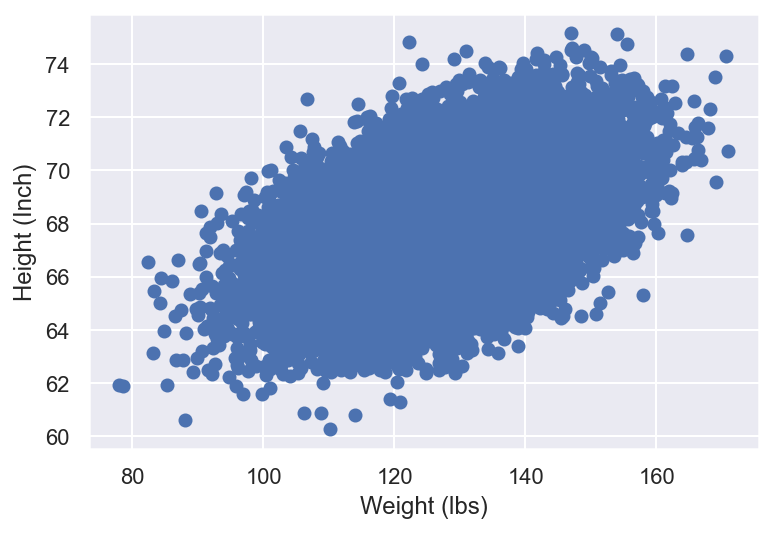

In [5]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)");

In [6]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

We leave 70% of the data as a training set, and 30% as a test set. Also we scale the data.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

Train the created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [9]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
sgd_reg = SGDRegressor(n_iter=1)
# it is enough to train for 1 iteration because after that the loss doesn't decrease
sgd_reg.fit(X_train_scaled, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.10s/it]


SGDRegressor(n_iter=1)

Draw a chart with the training process – the dependency of mean squared error on the i-th SGD iteration number.

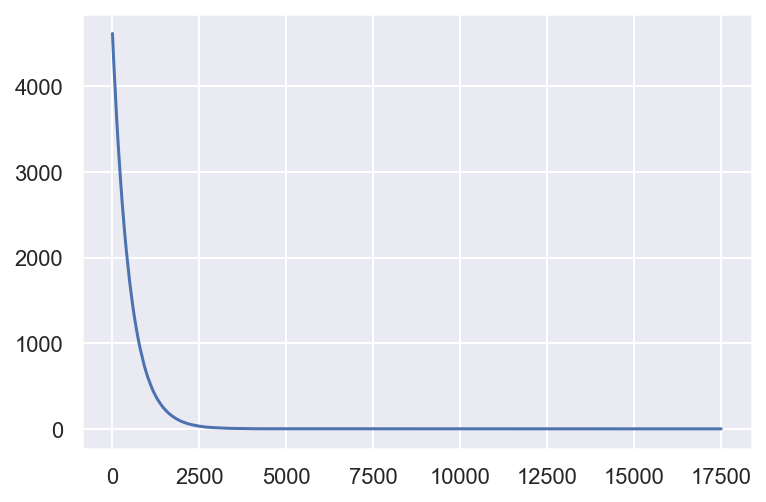

In [10]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)

Print the minimal value of mean squared error and the best weights vector.

In [11]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
min(sgd_reg.mse_), sgd_reg.w_

(2.715134494506392, array([67.98891336,  0.94581438]))

Draw the chart of model weights ($w_0$ and $w_1$) as they changed during training.

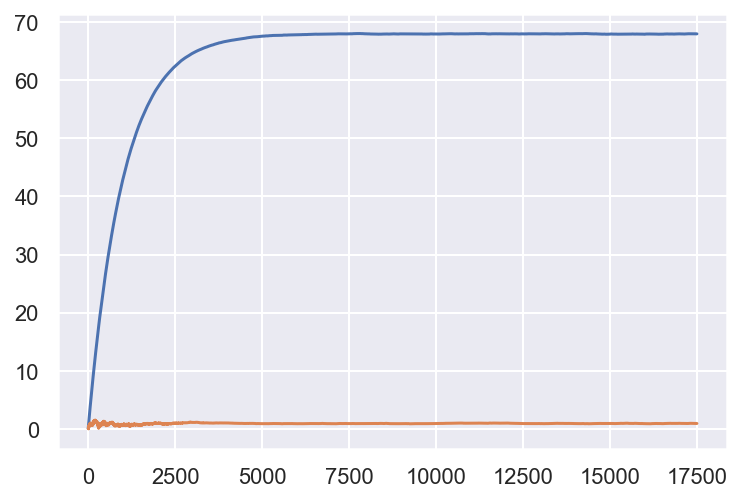

In [12]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
plt.plot(range(len(sgd_reg.weights_)), [w[0] for w in sgd_reg.weights_])
plt.plot(range(len(sgd_reg.weights_)), [w[1] for w in sgd_reg.weights_])

Make a prediction for the hold-out test set `(X_valid_scaled, y_valid)` and check the corresponding MSE value.

In [13]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
pred = sgd_reg.predict(X_valid_scaled)
valid_mse = mean_squared_error(y_valid, pred)
pred, valid_mse

(array([66.25609502, 67.07117896, 67.25923196, ..., 68.50467218,
        67.52428432, 67.84786109]),
 2.6708126194958632)

Now do the same thing for the `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for the same hold-out set.

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.intercept_, lr.coef_

(67.98930834742858, array([0.94537278]))

In [15]:
pred_sklearn = lr.predict(X_valid_scaled)
valid_mse_sklearn = mean_squared_error(y_valid, pred_sklearn)
pred_sklearn, valid_mse_sklearn

(array([66.25729906, 67.07200243, 67.25996763, ..., 68.50482636,
        67.52489624, 67.84832193]),
 2.670830767667635)

**<font color='red'>Question 1.</font> In which decimal do we see the difference between MSE for linear regressor and `SGDRegressor`?**
 - 2
 - 3
 - 4
 - 5 **[+]**

**Bonus**

This is a plot of a scaled validation set with two line:
* Black line - prediction from SGDRegressor (my implementation)
* Red line - prediction from LinearRegression (sklearn's implementation)

These lines show how linear regression attempts to draw a straight line that will minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

Text(0, 0.5, 'Height (scaled)')

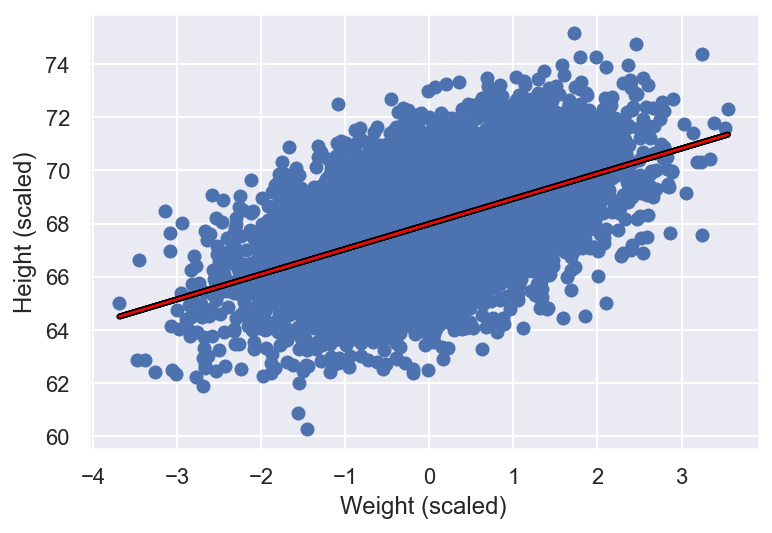

In [16]:
fig, ax = plt.subplots()

plt.scatter(X_valid_scaled, y_valid)
plt.plot(X_valid_scaled, pred, color="black", linewidth=3)
plt.plot(X_valid_scaled, pred_sklearn, color="red", linewidth=1)
plt.xlabel("Weight (scaled)")
plt.ylabel("Height (scaled)")

## 2. Logistic Regression and SGD
Let us sort out now, how the very same stochastic approach can help to train logistic regression.

Let's consider a classification task, where $X$ – is a training dataset with size $\ell \times (d+1)$ (first column is a vector of ones), and $y$ – is the target vector, $y_i \in \{-1, 1\}$. In [topic 4, part 2](https://mlcourse.ai/book/topic04/topic4_linear_models_part2_logit_likelihood_learning.html) of this course we described how logistic regression with $L_2$-regularization yields the following minimization problem:

$$\large C\sum_{i=1}^\ell \log{(1 + e^{-y_iw^Tx_i})} + \frac{1}{2}\sum_{j=1}^d w_j^2 \rightarrow min_w$$

**<font color='red'>Solution:</font>**
$$ J(w) = C\sum_{i=1}^\ell \log{(1 + e^{-y_iw^Tx_i})} + \frac{1}{2}\sum_{j=1}^d w_j^2$$

First, differentiate $f(z) = \log{(1 + e^{-z})}$:

$$\frac{df}{dz} = \frac{1}{1 + e^{-z}}\frac{d(1 + e^{-z})}{dz} =  -\frac{1}{1 + e^{-z}}e^{-z} = -\frac{1}{e^z+1} = -\sigma(-z)$$

Next,
$$\frac{\partial{J}}{\partial{w_0}} = -C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i) \frac{d(y_iw^Tx_i)}{dw_0} = -C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i)~y_i$$

For $j \neq 0$:

$$\frac{\partial{J}}{\partial{w_j}} = -C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i) \frac{d(y_iw^Tx_i)}{dw_j} + \frac{d(\frac{1}{2}\sum_{j=1}^d w_j^2)}{dw_j} = -C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i)~y_ix_{ij} + w_j$$

Weights update for gradient descent (not stochastic this time):

$$w_j^{(t+1)} = w_j^{(t)} -\eta \frac{\partial{J}}{\partial{w_j}}$$

or

$$w_0^{(t+1)} = w_0^{(t)} +\eta C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i)~y_i$$
$$w_j^{(t+1)} = w_j^{(t)} +\eta (C\sum_{i=1}^\ell \sigma(-y_iw^Tx_i)~y_ix_{ij} - w_j), j\in 1 \ldots d$$

With stochastic approach we remove summation:

$$w_j^{(t+1)} = w_j^{(t)} + \eta (Cy_i x_{ij} \sigma(-y_iw^Tx_i) -  \delta_{j\neq0}w_j)$$


**<font color='red'>Question 2.</font> Which formula will be used for update of logistic regression weights during stochastic gradient descent training?**
 - $w_j^{(t+1)} = w_j^{(t)} + \eta (Cy_i x_{ij} \sigma(y_iw^Tx_i) +  \delta_{j\neq0} w_j)$
 - $w_j^{(t+1)} = w_j^{(t)} - \eta (Cy_i x_{ij} \sigma(-y_iw^Tx_i) +  \delta_{j\neq0}w_j)$
 - $w_j^{(t+1)} = w_j^{(t)} - \eta (Cy_i x_{ij} \sigma(y_iw^Tx_i) -  \delta_{j\neq0}w_j )$ 
 - $w_j^{(t+1)} = w_j^{(t)} + \eta (Cy_i x_{ij} \sigma(-y_iw^Tx_i) -  \delta_{j\neq0}w_j)$ **[+]**
 
Here:
- $i \in {0,\ldots, \ell-1}, j \in {0,\ldots, d}$
- C – regularization coefficient
- $x_{ij} $ – element of the X matrix at row $i$ and column $j$ (indexing starts from 0), 
- $x_i$ – $i$-th row of $X$ matrix (indexing from 0), 
- $w_j^{(t)}$ – value of $j$-th element of weights vector $w$ during step $t$ of stochastic gradient descent
- $\eta$ – small constant value, step of gradient descent
- $\delta_{j\neq0}$ – Kronecker symbol, i.e. 1, if $j\neq0$ and $0$ otherwise 

Let's implement the `SGDClassifier` class. Specs for this class:
- we inherit our class from `sklearn.base.BaseEstimator`
- constructor has the following parameters: `eta` – gradient descent step (default value is $10^{-3}$), `n_iter` – iterations count (default is 10) and `C` – regularization coefficient
- additionally, let's create  `loss_` and `weights_` lists in order to track values of logistic loss and weight vector over gradient descent iterations
- class has `fit`, `predict` and `predict_proba` methods
- The `fit` method has parameters `X`(matrix) and `y`(vector) (`numpy.array` objects, we assume we have binary classification, and values in vector `y` can only be either -1 or 1). We add a column of ones to `X` from the left, initialize `w` vector with **zeros** and iteratively (`n_iter` times) update weights with expression we got earlier, also logging log_loss and weight `w` values into corresponding lists. 
- In the end `fit` must create `w_` and store weight vector with the smallest loss value
- The `fit` method must return object of `SGDClassifier` type, i.e. `self`
- The `predict_proba` method gets `X` matrix, adds column of ones from the left and returns matrix with predictions (you get same matrices from `predict_proba` methods in `sklearn`), using vector `w_` we created by `fit` method
- `predict` method calls `predict_proba` and returns answer vector: -1, if predicted probability of 1 is less than 0.5 and 1 otherwise
- And **important**: in order to avoid problems with computation of big and small values with exponent (overflow & underflow) use the following `sigma` function.

In [17]:
def sigma(x):
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

In [18]:
def kronecker_symbol(j):
    return 1 if j != 0 else 0

In [19]:
class SGDClassifier(BaseEstimator):
    def __init__(self, C=1, eta=1e-3, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.C = C
        self.loss_ = []
        self.weights_ = []
    
    def fit(self, X, y):
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        w = np.zeros(X.shape[1])
        
        for iter in range(self.n_iter):
            for i in range(X.shape[0]):
                
                new_w = w.copy()
                
                sigma_arg = -y[i] * np.dot(w, X[i, :])
                
                for j in range(X.shape[1]):
                    new_w[j] = w[j] + self.eta * (self.C * y[i] * X[i, j] * sigma(sigma_arg) - kronecker_symbol(j) * w[j])
                
                w = new_w.copy()
            
                self.loss_.append(log_loss(y, sigma(np.dot(X, w))))
                self.weights_.append(w)
        
        self.w_ = self.weights_[np.argmin(self.loss_)]
        
        return self
            
    
    def predict_proba(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        proba = sigma(np.dot(X, self.w_)).reshape((X.shape[0], 1))
        
        return np.hstack([1 - proba, proba])
    
    def predict(self, X):
        preds = [-1 if proba[1] < 0.5 else 1 for proba in self.predict_proba(X)]
        return preds


# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

Let's test `SGDClassifier` with breast cancer UCI dataset.

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
cancer = load_breast_cancer()
# change labels in y from 0 to -1
X, y = cancer.data, [-1 if i == 0 else 1 for i in cancer.target]

Let's split dataset - 70% for training and 30% – as a holdout set. Let's also scale the data.

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Train `SGDClassifier` with the scaled training set with the following parameters: `C`=1, `eta`=$10^{-3}$ and `n_iter`=3.

In [24]:
log_reg = SGDClassifier(C=1, eta=1e-3, n_iter=3)
log_reg.fit(X_train_scaled, y_train)

SGDClassifier(n_iter=3)

Make a plot of `log_loss` as it's changing during training.

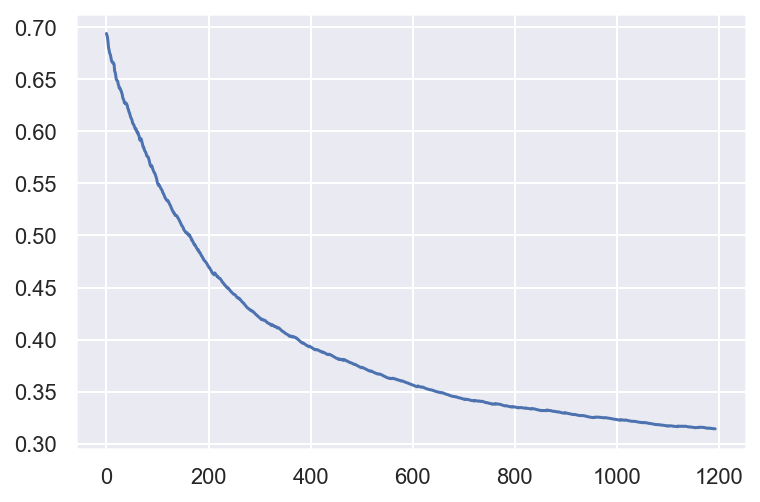

In [25]:
plt.plot(log_reg.loss_)

Now train `SGDClassifier` with `C`=1000 increasing the number of iterations over the training set to 10.

In [26]:
log_reg = SGDClassifier(C=1000, eta=1e-3, n_iter=10)
log_reg.fit(X_train_scaled, y_train)

SGDClassifier(C=1000)

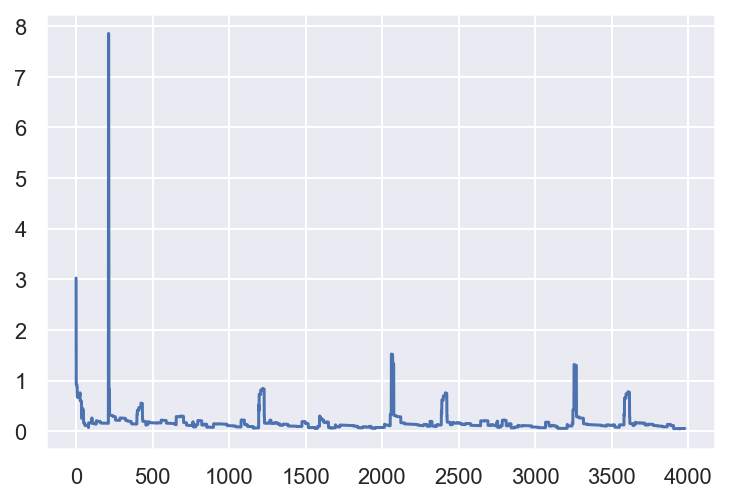

In [27]:
plt.plot(log_reg.loss_)

Now check out the model weights vector with minimal loss on the training set.

In [28]:
feature_weights = dict(zip(cancer.feature_names, log_reg.w_[1:]))

In [29]:
sorted(feature_weights.items(), key=lambda item: np.abs(item[1]), reverse=True)[:5]

[('worst concavity', -5.107342772599416),
 ('fractal dimension error', 4.660667699024958),
 ('compactness error', 4.535058837465538),
 ('radius error', -4.531818797422843),
 ('worst texture', -4.051563707793042)]

**<font color='red'>Question 3.</font> Which feature has the highest impact on probability of benign tumour, according to  `SGDClassifier` model? (be careful to check the length of the weight vector you get after training,  and compare with number of features in our task)**
 - worst compactness
 - worst smoothness
 - worst concavity **[+]**
 - concave points error
 - concavity error
 - compactness error
 - worst fractal dimension

In [30]:
log_reg = SGDClassifier(C=1000, eta=1e-3, n_iter=10)
log_reg.fit(X_train_scaled, y_train)
pred_proba = log_reg.predict_proba(X_valid_scaled)[:, 1]
pred = log_reg.predict(X_valid_scaled)
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [31]:
print(f"The loss is {log_loss(y_valid, pred_proba)} for my implementation of SGDClassifier")
print(f"The ROC-AUC is {roc_auc_score(y_valid, pred_proba)} for my implementation of SGDClassifier")

The loss is 0.43441107939579554 for my implementation of SGDClassifier
The ROC-AUC is 0.9763040238450075 for my implementation of SGDClassifier


Compute log_loss and ROC AUC for hold-out validation set, and do all the same with  `sklearn.linear_model.LogisticRegression` (leave default parameters for this object, only set random_state=17) and compare results.

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=17)
lr.fit(X_train_scaled, y_train)
pred_proba_lr = lr.predict_proba(X_valid_scaled)[:, 1]
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [33]:
print(f"The loss is {log_loss(y_valid, pred_proba_lr)} for sklearn.linear_model.LogisticRegression")
print(f"The ROC-AUC is {roc_auc_score(y_valid, pred_proba_lr)} for sklearn.linear_model.LogisticRegression")

The loss is 0.10855223162447228 for sklearn.linear_model.LogisticRegression
The ROC-AUC is 0.9885245901639343 for sklearn.linear_model.LogisticRegression


## 3. Logistic regression and SGDClassifier and movie review classification task

Let's look at logistic regression and its SGD variation for classification of reviews from IMDB. We know this task from the 4-th and the 8-th topics of the course, and we also used it here in the 5-th bonus assignment. 

We will import the data and train `CountVectorizer` with the available data.

In [34]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [35]:
reviews = pd.read_csv("../data/assignment5/movie_reviews_train.csv.zip")

In [36]:
reviews.head()

,label,text
0,1,"To an entire generation of filmgoers, it just ..."
1,1,Pixar classic is one of the best kids' movies ...
2,1,Apesar de representar um imenso avanço tecnoló...
3,1,"When Woody perks up in the opening scene, it's..."
4,1,Introduced not one but two indelible character...


Perform train/validation split.

In [37]:
reviews_train, reviews_valid, y_train, y_valid = train_test_split(
    reviews["text"], reviews["label"], test_size=0.3, random_state=17
)

We are going to train `CountVectorizer` with data we have, while counting bigrams. By doing this we come to sparse data representation, where we have a feature for each unique word and pair of consecutive words. We get over 1.5 billion of features therefore.

In [38]:
%%time
cv = CountVectorizer(ngram_range=(1, 2))
X_train = cv.fit_transform(reviews_train)
X_valid = cv.transform(reviews_valid)

CPU times: total: 21 s
Wall time: 21 s


In [39]:
X_train.shape, X_valid.shape

((106827, 2238247), (45783, 2238247))

Train logistic regression with data `(X_train, y_train)` and default parameters (except for `random_state`= 17 to get reproducible result) and calculate ROC AUC with the validation set. Measure the time of the model's training. We don't need to scale the data because our features are counters and they are already spread across roughly the same ranges.

In [40]:
lr_imdb = LogisticRegression(random_state=17)

In [41]:
%%time
lr_imdb.fit(X_train, y_train)

CPU times: total: 55.3 s
Wall time: 36.9 s


C:\Users\ryblo\Documents\projects\mlcourse_ai_bonus_assignments\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=17)

In [42]:
pred_lr_imdb = lr_imdb.predict_proba(X_valid)
auc_lr_imdb = roc_auc_score(y_valid, pred_lr_imdb[:, 1])
auc_lr_imdb

0.9066679655655181

--------
Now we move to the online algorithm. We implemented our `SGDClassifier` and understood how it works, but additional efforts are required to make it effective, for example, to support sparse features. Let's now switch to the `sklearn`-implementation of the SGD-algorithm. Check out [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) docs, and make a note in which aspects `SGDClassifier` from `Sklearn` is more advanced than our own SGD. 

**<font color='red'>Question 4.</font> In which aspects is the `Sklearn` implementation more advanced than the `SGDClassifier` that we implemented? Select all correct options.**
 - Gradient descent step can be varied **[+]**
 - Linear SVM is implemented **[+]**
 - Early stopping is implemented to avoid over-fitting **[+]**
 - Can be run on multiple CPUs **[+]**
 - LASSO is supported **[+]**
 - Online learning of decision trees is supported
 - Mini-batch training is supported (i.e. weight updates weights with several training examples at a time) **[+]**

Run 100 iterations of SGD-logistic regression (again, `random_state`=17) with the same data. Measure the training time and note how faster the SGD version is.

In [43]:
sgd_imdb = SGDClassifier(random_state=17, loss="log", max_iter=100)

In [44]:
%%time
sgd_imdb.fit(X_train, y_train)

CPU times: total: 1.31 s
Wall time: 1.32 s


SGDClassifier(loss='log', max_iter=100, random_state=17)

In [45]:
pred_sgd_imdb = sgd_imdb.predict_proba(X_valid)
auc_sgd_imdb = roc_auc_score(y_valid, pred_sgd_imdb[:, 1])
auc_sgd_imdb

0.9007416736065623

In [46]:
auc_sgd_imdb, auc_lr_imdb

(0.9007416736065623, 0.9066679655655181)

**<font color='red'>Question 5.</font> In which decimal do we see the difference between validation ROC AUC-s for logistic regression and `Sklearn` SGD classifier with logistic loss function?**
 - 2
 - 3 **[+]**
 - 4
 - 5